In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
users = pd.read_csv('takehome_users.csv', encoding='latin-1')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
engagement = pd.read_csv('takehome_user_engagement.csv')
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [5]:
first_date = engagement['time_stamp'].min()
last_date = engagement['time_stamp'].max()
print(f"Earliest Date: {first_date}")
print(f"Latest Date: {last_date}")

Earliest Date: 2012-05-31 08:20:06
Latest Date: 2014-06-06 14:58:50


In [6]:
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'])
engagement = engagement.set_index(['time_stamp','user_id'])
grouped = engagement.groupby([pd.Grouper(level='user_id'),
                              pd.Grouper(level='time_stamp', freq='7D')]
          ).sum()
grouped['adopted'] = grouped['visited']>2
grouped = grouped.reset_index()
grouped = grouped.groupby('user_id').max()
grouped.head()

,time_stamp,visited,adopted
user_id,,,
1,2014-04-17,1,False
2,2014-03-27,2,False
3,2013-03-14,1,False
4,2013-05-16,1,False
5,2013-01-17,1,False


In [7]:
users = users.rename(columns={'object_id':'user_id'})
df = users.join(grouped['adopted'], on='user_id',how='left')
df.head(10)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,False
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,False
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,False
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,True


In [8]:
df.isna().sum()

user_id                          0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
adopted                       3177
dtype: int64

3177 users have not logged into the product at once.

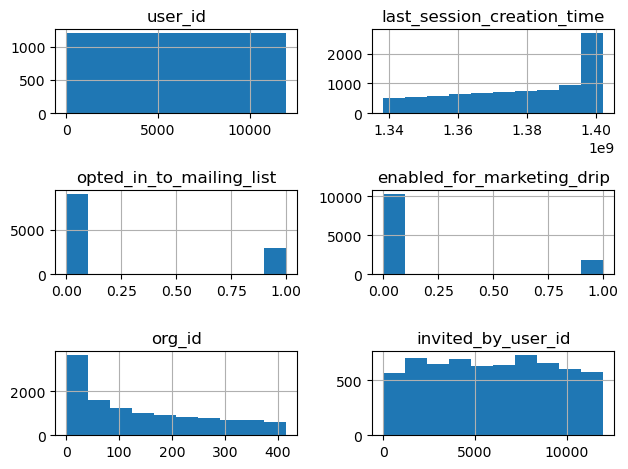

In [9]:
df.hist()
plt.tight_layout();

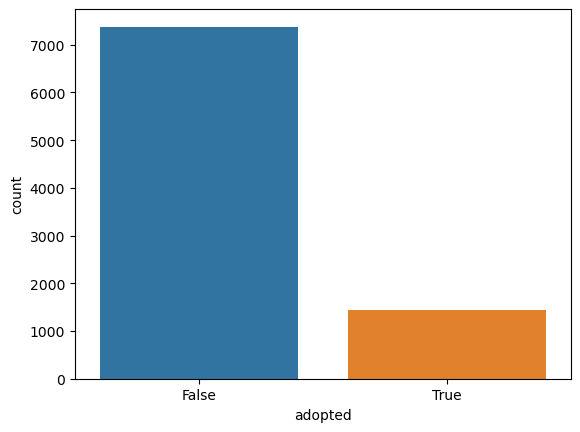

In [10]:
sns.countplot(data=df, x='adopted');

In [11]:
counts = df['adopted'].value_counts()
percent_adopted = counts[1] / (counts.sum()) * 100
print(f'Percent of users adopted: {percent_adopted}')

Percent of users adopted: 16.377649325626205


In [12]:
percent_missing = df['adopted'].isna().sum() / len(df) * 100
print(f'Percent of users who have not logged in: {percent_missing}')

Percent of users who have not logged in: 26.474999999999998


In [13]:
top_orgs = df['org_id'].value_counts().head(10).index.to_list()
print(top_orgs)
df['in_top_10_orgs'] = df['org_id'].isin(top_orgs)
df['in_top_10_orgs'] = df['in_top_10_orgs'].astype('int')
df.head()

[0, 1, 2, 3, 4, 6, 5, 9, 7, 10]


,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,in_top_10_orgs
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,False,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False,0


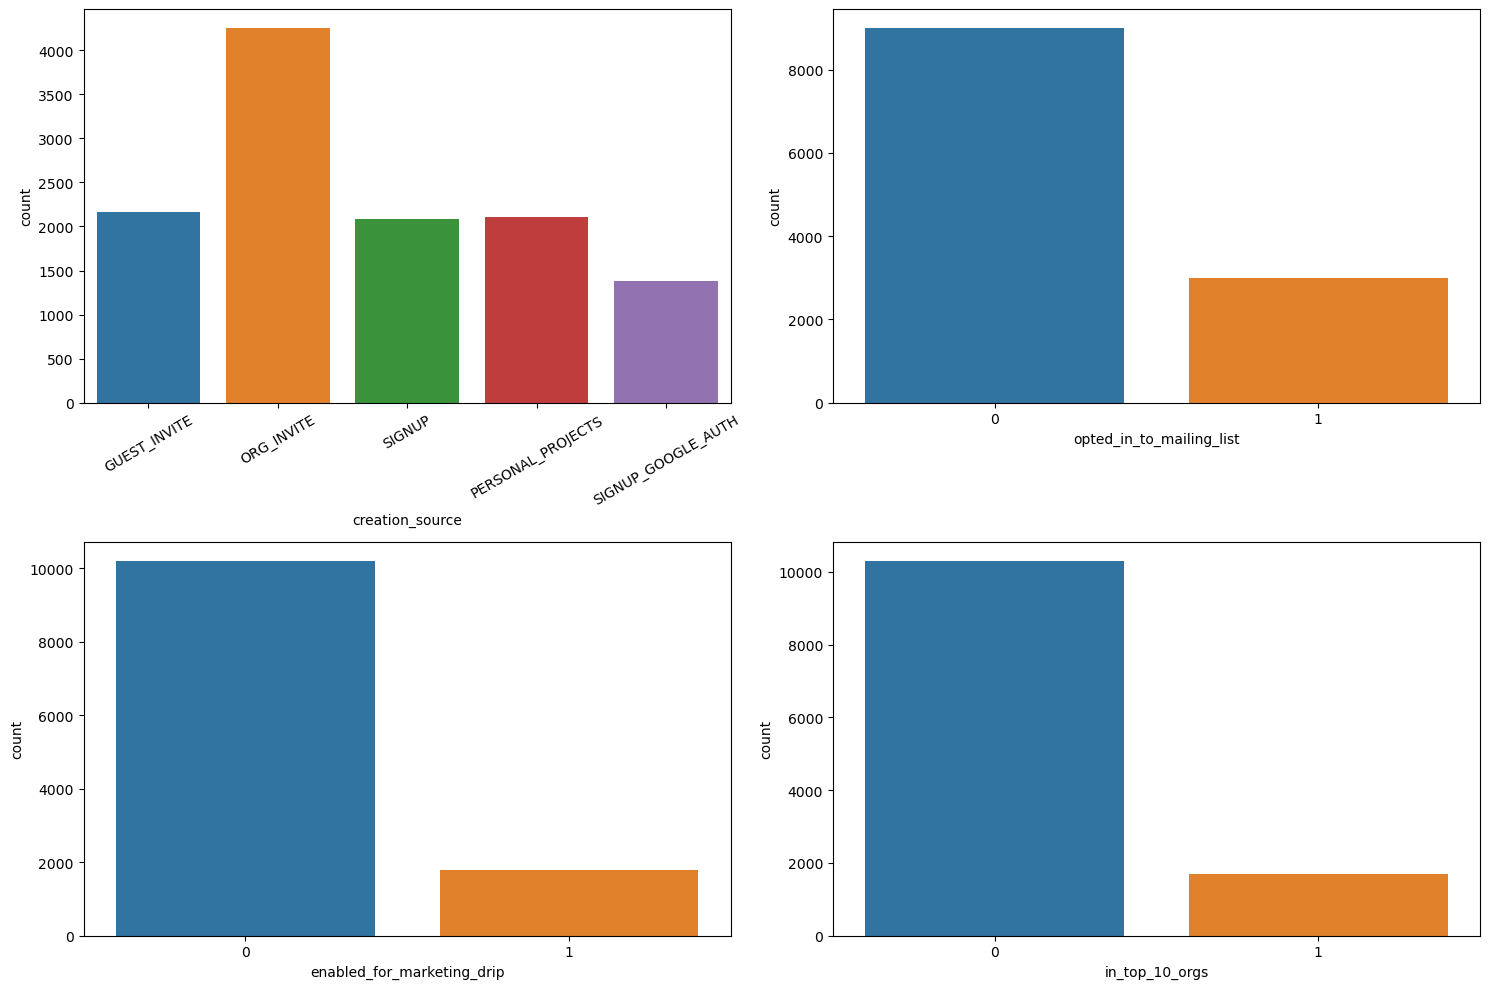

In [14]:
cols = ['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'in_top_10_orgs']
fig, axes = plt.subplots(2,2, figsize=(15,10))
for col, ax in zip(cols, axes.flat):
    sns.countplot(ax=ax, data=df, x=col)
    if col == 'creation_source':
        ax.tick_params(axis='x', rotation=30)
plt.tight_layout();

In [15]:
def plot_proportion(df, col, rotation=0):
    x, y, hue = col, "proportion", "adopted"
    hue_order = [True, False]

    (df[x]
     .groupby(df[hue])
     .value_counts(normalize=True)
     .rename(y)
     .reset_index()
     .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
    plt.xticks(rotation=rotation);

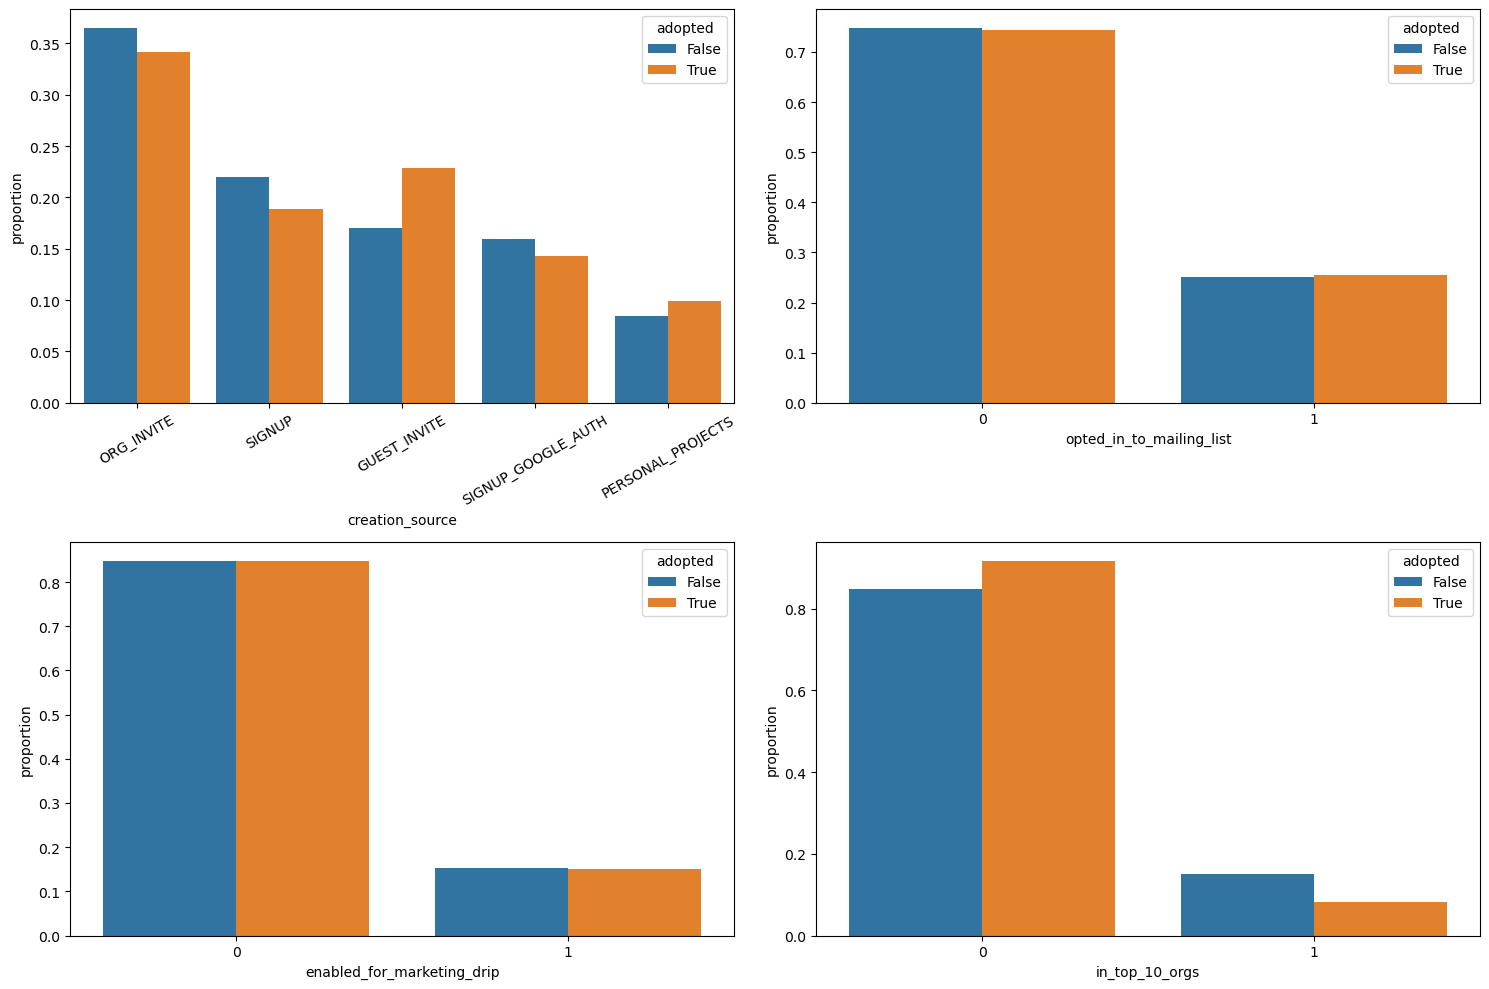

In [16]:
cols = ['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'in_top_10_orgs']
fig, axes = plt.subplots(2,2, figsize=(15,10))
for col, ax in zip(cols, axes.flat):
    x, y, hue = col, "proportion", "adopted"
    hue_order = [True, False]

    (df[x]
     .groupby(df[hue])
     .value_counts(normalize=True)
     .rename(y)
     .reset_index()
     .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, ax=ax))
    if col == 'creation_source':
        ax.set_xticklabels(ax.get_xticklabels(), rotation=30);
plt.tight_layout()

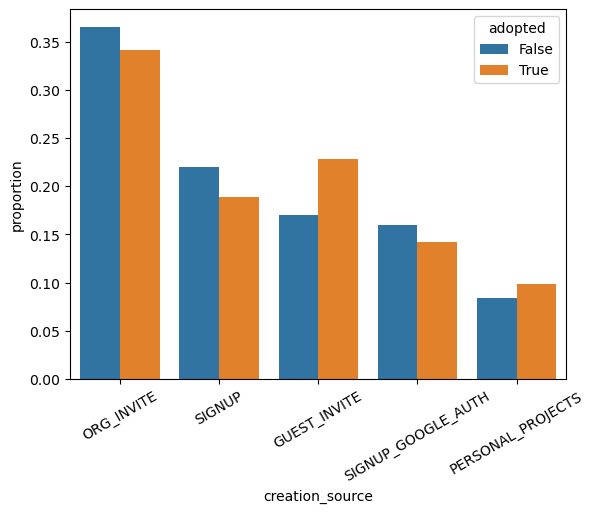

In [17]:
plot_proportion(df,'creation_source', rotation=30)

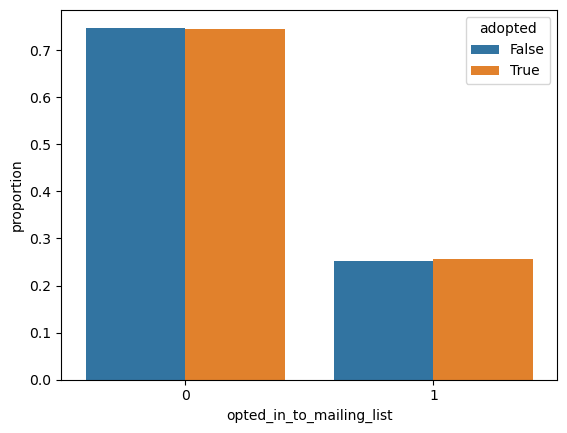

In [18]:
plot_proportion(df,'opted_in_to_mailing_list')

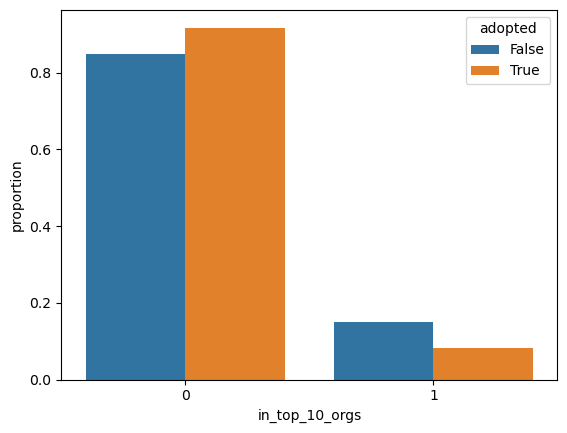

In [19]:
plot_proportion(df,'in_top_10_orgs')

In [20]:
from scipy import stats

columns = ['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'in_top_10_orgs']
df_chi2 = pd.get_dummies(df[columns])
features = df_chi2.columns.to_list()
df_chi2['adopted'] = df['adopted']
rows = []

for col in features:

    data_crosstab = pd.crosstab(df_chi2['adopted'], df_chi2[col],
                                margins=True,margins_name='Total')
    stat, p, dof, expected = stats.chi2_contingency(data_crosstab)
    row = (col, stat, p)
    rows.append(row)

chi2 = pd.DataFrame(rows, columns=['feature', 'chi2','p'])
chi2 = chi2.sort_values('chi2', ascending=False)
chi2

,feature,chi2,p
2,in_top_10_orgs,47.350876,1.288703e-09
3,creation_source_GUEST_INVITE,27.415270,1.638297e-05
6,creation_source_SIGNUP,7.021134,1.347756e-01
5,creation_source_PERSONAL_PROJECTS,3.343091,5.021339e-01
4,creation_source_ORG_INVITE,3.040862,5.510106e-01
7,creation_source_SIGNUP_GOOGLE_AUTH,2.713522,6.068504e-01
0,opted_in_to_mailing_list,0.086232,9.990968e-01
1,enabled_for_marketing_drip,0.002502,9.999992e-01


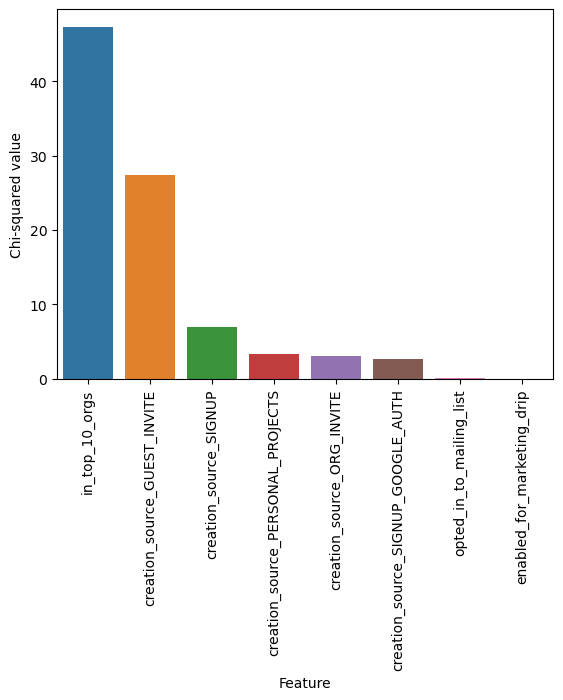

In [21]:
sns.barplot(data=chi2, x='feature', y='chi2')
plt.xticks(rotation=90)
plt.ylabel('Chi-squared value')
plt.xlabel('Feature');

In [22]:
df = df.loc[df['adopted'].notna()]
X = df[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'in_top_10_orgs']]
y = df['adopted'].astype('bool')

In [23]:
X = pd.get_dummies(X).drop(columns=['creation_source_SIGNUP'])

In [24]:
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV, GridSearchCV, KFold, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from io import StringIO  
from IPython.display import Image  
import pydotplus

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=426)

In [26]:
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=3)
rf_model = RandomForestClassifier(criterion='gini', n_jobs=-1)
lr_model = LogisticRegression()

models = [tree_model, rf_model, lr_model]
names = ['Decision Tree', 'Random Forest', 'Logistic Regression']

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=22)

Initial Decision Tree f1 score: 0.8361795607803376
Initial Random Forest f1 score: 0.8361795607803376
Initial Logistic Regression f1 score: 0.8361795607803376


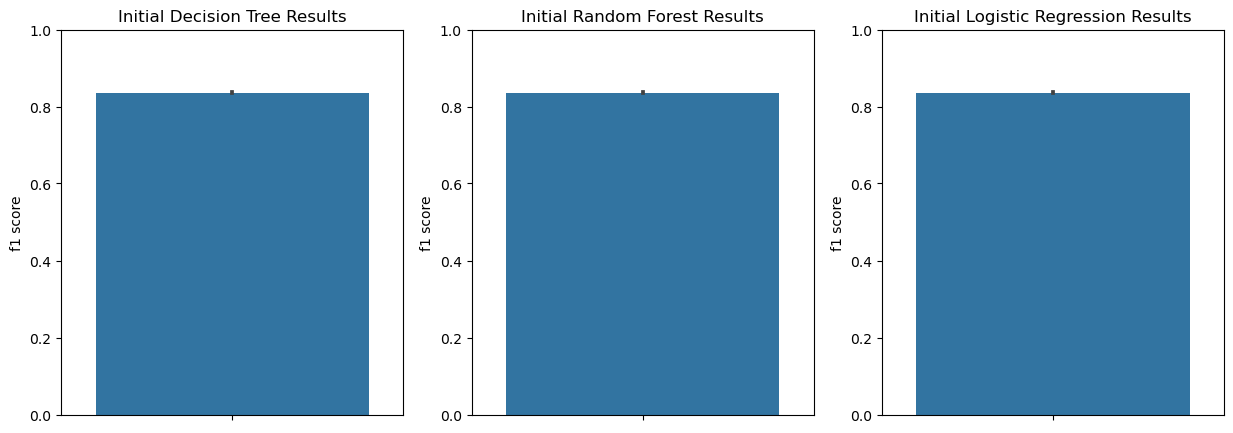

In [27]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
for model, name, ax in zip(models, names, axes):
    cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring = 'accuracy', n_jobs=-1)
    sns.barplot(ax=ax, data=cv_results, y='test_score')
    ax.set_title(f'Initial {name} Results')
    ax.set_ylabel('f1 score')
    ax.set_ylim(0,1)
    print(f"Initial {name} f1 score: {cv_results['test_score'].mean()}");

In [28]:
cv_results = cross_validate(tree_model, X_train, y_train, cv=cv, scoring = 'recall', n_jobs=-1)
print(f"Initial f1 score: {cv_results['test_score'].mean()}")

Initial f1 score: 0.0


In [29]:
tree_model.fit(X_train, y_train)
tree_model.predict(X_train).sum()

0

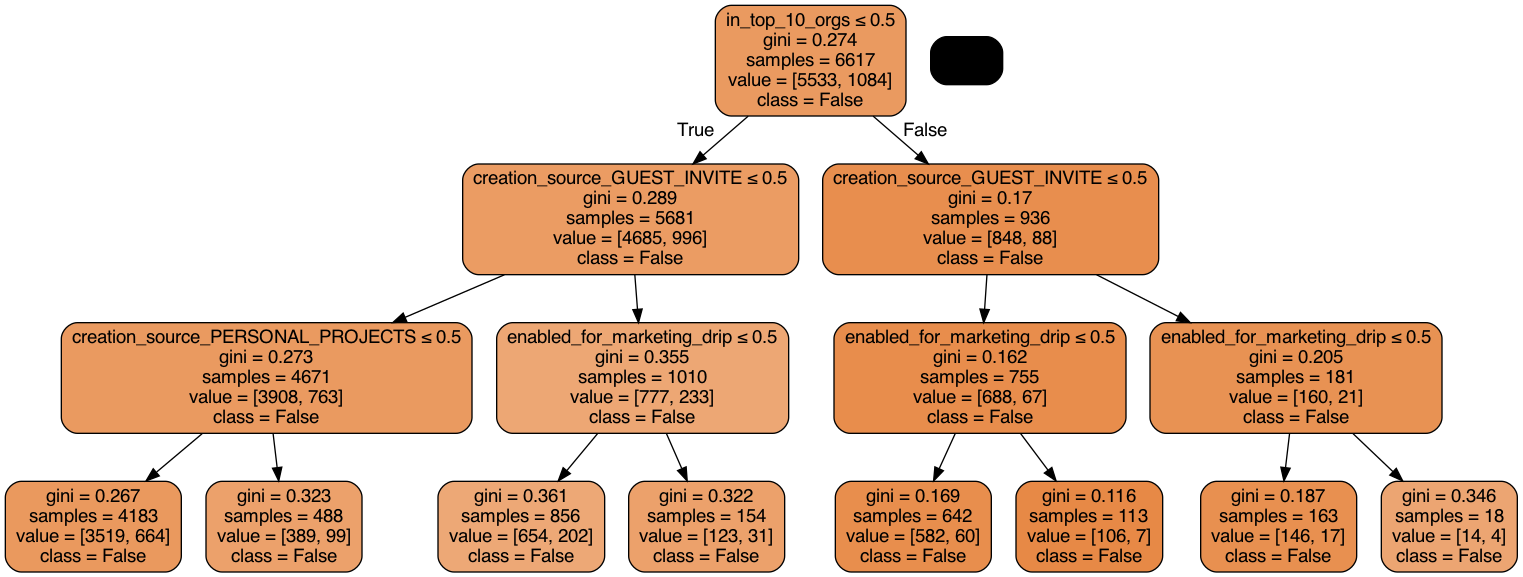

In [30]:
dot_data = StringIO()

export_graphviz(tree_model, out_file=dot_data, filled=True, rounded=True,
                    special_characters=True, feature_names = X_train.columns, class_names=['False','True'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [31]:
max_depths = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depths.extend([3,5,7])
random_grid_tree ={'max_features': ['sqrt', 'log2'],
             'max_depth': max_depths,
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4]}
tree_model = DecisionTreeClassifier(random_state=44)
tree_random = RandomizedSearchCV(estimator=tree_model, param_distributions=random_grid_tree,
                              n_iter=60, scoring='f1', n_jobs=-1, cv=cv, random_state=50)
tree_result = tree_random.fit(X_train, y_train)
tree_best = tree_result.best_estimator_
print(f'Best score: {tree_result.best_score_}')
print(f'Best parameters: {tree_result.best_params_}')

Best score: 0.0
Best parameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 5}


In [32]:
random_grid_rf = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
             'criterion': ['gini', 'entropy'],
             'max_features': ['sqrt', 'log2'],
             'max_depth': [int(x) for x in np.linspace(10, 100, num = 10)],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4]}
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=31)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid_rf,
                              n_iter=60, scoring='f1', n_jobs=-1, cv=cv, random_state=50)
rf_result = rf_random.fit(X_train, y_train)
rf_best = rf_result.best_estimator_
print(f'Best score: {rf_result.best_score_}')
print(f'Best parameters: {rf_result.best_params_}')

Best score: 0.0
Best parameters: {'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40, 'criterion': 'gini'}


In [33]:
from scipy.stats import loguniform

grid_lr = {'C': np.logspace(start=-5, stop=3, num=9),
             'solver': ['liblinear','lbfgs','sag','saga']}
lr_model = LogisticRegression()
lr_random = GridSearchCV(estimator=lr_model, param_grid=grid_lr,
                         scoring='f1', n_jobs=-1, cv=cv)
lr_result = lr_random.fit(X_train, y_train)
lr_best = lr_result.best_estimator_
print(f'Best score: {lr_result.best_score_}')
print(f'Best parameters: {lr_result.best_params_}')

Best score: 0.0
Best parameters: {'C': 1e-05, 'solver': 'liblinear'}


/Users/bjnugent/opt/anaconda3/envs/tree_case_study/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


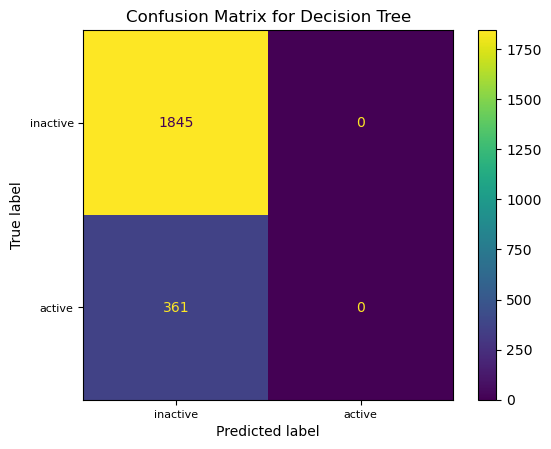

/Users/bjnugent/opt/anaconda3/envs/tree_case_study/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


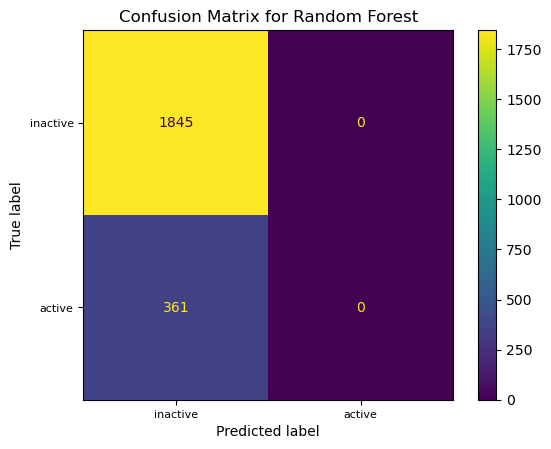

/Users/bjnugent/opt/anaconda3/envs/tree_case_study/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


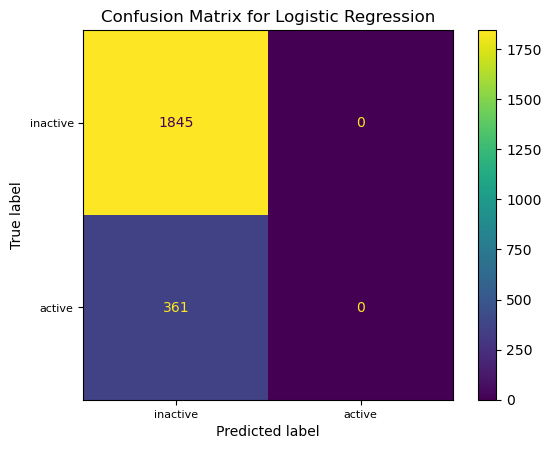

,Model Name,Accuracy,F1,Precision,Recall,Model,Parameters
0,Decision Tree,0.836355,0.0,0.0,0.0,"DecisionTreeClassifier(max_depth=5, max_featur...","{'ccp_alpha': 0.0, 'class_weight': None, 'crit..."
1,Random Forest,0.836355,0.0,0.0,0.0,"(DecisionTreeClassifier(max_depth=40, max_feat...","{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
2,Logistic Regression,0.836355,0.0,0.0,0.0,"LogisticRegression(C=1e-05, solver='liblinear')","{'C': 1e-05, 'class_weight': None, 'dual': Fal..."


In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

results =[]
best_models = [tree_best, rf_best, lr_best]
for name, model in zip(names, best_models):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test, pos_label=True)
    precision = precision_score(y_pred, y_test, pos_label=True)
    recall = recall_score(y_pred, y_test, pos_label=True)
    params = model.get_params()
    row = (name, accuracy, f1, precision, recall, model, params)
    results.append(row)
    
    cm = confusion_matrix(y_test, y_pred, labels = model.classes_)
    fig, ax = plt.subplots()
    display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                        display_labels = ['inactive', 'active'])
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(labels = ['inactive', 'active'], fontsize = 8)
    ax.set_yticklabels(labels = ['inactive', 'active'], fontsize = 8)
    display_cm.plot(ax = ax)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

columns = ['Model Name','Accuracy','F1','Precision','Recall', 'Model', 'Parameters']
results_df = pd.DataFrame(results, columns=columns)
results_df.head()

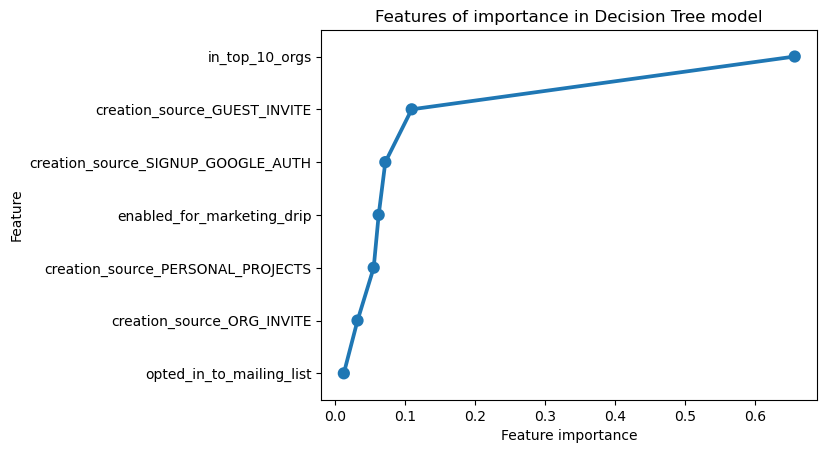

Feature 1: in_top_10_orgs
    Importance: 0.6565814125338864
Feature 2: creation_source_GUEST_INVITE
    Importance: 0.10950224519503858
Feature 3: creation_source_SIGNUP_GOOGLE_AUTH
    Importance: 0.07180227416659486
Feature 4: enabled_for_marketing_drip
    Importance: 0.06229534389970731
Feature 5: creation_source_PERSONAL_PROJECTS
    Importance: 0.055199053697114864
Feature 6: creation_source_ORG_INVITE
    Importance: 0.03209532594428251
Feature 7: opted_in_to_mailing_list
    Importance: 0.012524344563375507


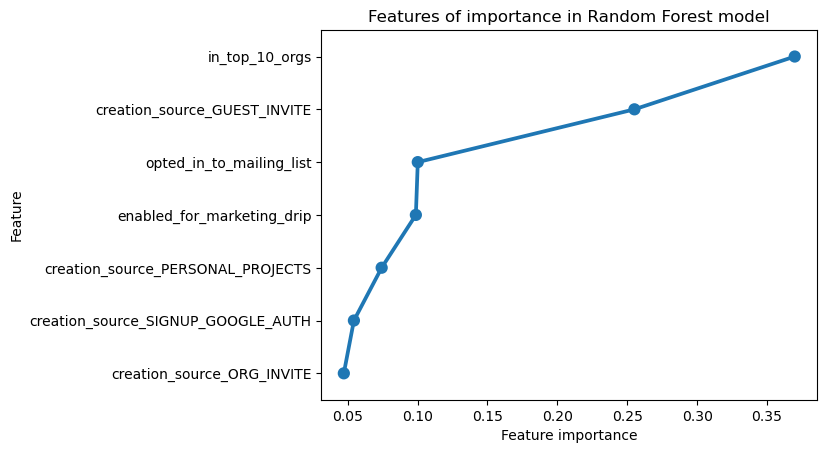

Feature 1: in_top_10_orgs
    Importance: 0.3697541778779324
Feature 2: creation_source_GUEST_INVITE
    Importance: 0.25511554828439037
Feature 3: opted_in_to_mailing_list
    Importance: 0.10018194836072918
Feature 4: enabled_for_marketing_drip
    Importance: 0.09880738273053301
Feature 5: creation_source_PERSONAL_PROJECTS
    Importance: 0.07434970495755172
Feature 6: creation_source_SIGNUP_GOOGLE_AUTH
    Importance: 0.054501805772280434
Feature 7: creation_source_ORG_INVITE
    Importance: 0.047289432016582825


In [35]:
for i in range(2):
    model_name = results_df.iloc[i,0]
    model = results_df.iloc[i,5]
    feature = model.feature_names_in_
    df = pd.DataFrame({'feature': model.feature_names_in_,
                      'feature_importance': model.feature_importances_})
    df.sort_values('feature_importance', ascending=False, inplace=True)

    sns.pointplot(data=df, y='feature', x='feature_importance')
    plt.title(f'Features of importance in {model_name} model')
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.show()

    for i in range(len(df)):
        feature = df.iloc[i,0]
        importance = df.iloc[i,1]
        print(f'Feature {i+1}: {feature}')
        print(f'    Importance: {importance}')